In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
df = pd.read_excel('Correlation3.xls')

for i in range(df.shape[0]):
    if df.iloc[i, 6] % 8 == 0:
        df.iloc[i, 6] = df.iloc[i, 6]//8
    elif df.iloc[i, 6] % 8 != 0:
        df.iloc[i, 6] = df.iloc[i, 6]//8 + 1
#ans = df.loc[:, 'Rankings'].to_list()
ans = dict()
for i in range(df.shape[0]):
    ans[df.iloc[i, 0]] = df.iloc[i, 6]

print(df.head)

<bound method NDFrame.head of                                              Filename  Ratio of Peaks Found  \
0   AeAlbo_Fcarc_OA.24_35.trim.fastq.uq.polyn.5to5...              0.857143   
1   AeAlbo_U4_4_cells.24_35.trim.fastq.uq.polyn.5t...              0.600000   
2   CuQuin_Ovary_NL.24_35.trim.fastq.uq.polyn.5to5...              0.750000   
3   AeAeg_Female_FJ_Ovary.24_35.trim.fastq.uq.poly...              0.857143   
4   Dmel_OvaryBeta_RAL375_sRNA.24_35.trim.fastq.uq...              0.266667   
5   CuQuin_Hsu_17dpi_WNV1.24_35.trim.fastq.uq.poly...              0.428571   
6   AnGam_Fcarc_TN.24_35.trim.fastq.uq.polyn.5to5_...              0.200000   
7   Dmel_OvaryBeta_RAL380_sRNA.24_35.trim.fastq.uq...              0.307692   
8   AnGam_Ovary_TN.24_35.trim.fastq.uq.polyn.5to5_...              0.300000   
9   AeAeg_Aag2_NL-M3.24_35.trim.fastq.uq.polyn.5to...              0.454545   
10  AnGam_Testes_BetaE.24_35.trim.fastq.uq.polyn.5...              0.357143   
11  AnGam_Mos55_cells.

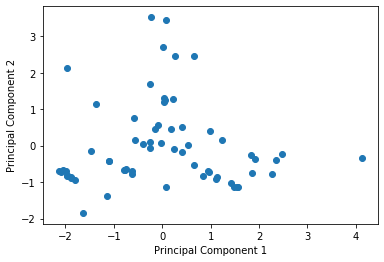

In [4]:
features = ['Ratio of Peaks Found', 'Ratio of Peaks to Ideal', 'Ratio of Range', 'Inverse Standard Deviation', 'Smoothing Error']
x = df.loc[:, features].values
y = df.loc[:, ['Rankings']]

x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df[['Rankings']]], axis = 1)

plt.scatter(finalDf.iloc[:, 0], finalDf.iloc[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [7]:
def findError(df, p, q, r, s):#, t):
    allScores = []
    for i in range(df.shape[0]):
        score = (df.iloc[i, 1]**p) * (df.iloc[i, 2]**q) * (df.iloc[i, 3]**r) * (df.iloc[i, 4]**s) #* (df.iloc[i, 5]**t)
        allScores.append(score)

    labels = df.iloc[:, 0].to_list()
    labels = [x for _,x in sorted(zip(allScores, labels))]
    #print(labels)
    
    error = 0
    for i in range(len(labels)):
        if (i+1) % 8 == 0:
            error += abs(ans[labels[i]] - (i+1)//8)#**2
        elif (i+1) % 8 != 0:
            error += abs(ans[labels[i]] - ((i+1)//8) + 1)#**2
        #error += abs(ans[labels[i]] - (i+1))
    return error

In [8]:
df = df.iloc[:, 0:6]
#print(df.shape)
vals = [np.random.uniform(0, 1000), np.random.uniform(0, 1000), np.random.uniform(0, 1000), np.random.uniform(0, 1000)]#, np.random.uniform(0, 1000)]
error = findError(df, vals[0], vals[1], vals[2], vals[3])#, vals[4])

num, iterator = 1000, 1
allVals = [i for i in range(0, num, iterator)]
allIndices = [i for i in range(int(num/iterator))]

def normalize(l):
    
    def findMax(l):
        max = 0
        for i in range(len(l)):
            if l[i] > max:
                max = l[i]
        return max
    
    max = findMax(l)
    for i in range(len(l)):
        l[i] = max - l[i]
    add = sum(l)
    if add == 0:
        return None
    #print(add)
    #print(l)
    for i in range(len(l)):
        l[i] /= add
    
    return l

for _ in range(500):
    i = np.random.choice([0, 1, 2, 3])#, 4])
    copyVals = vals[:]
    copyVals[i] = 1
    recordVal = None
    allErrors = []
    while copyVals[i] < num + 1:
        allErrors.append(findError(df, copyVals[0], copyVals[1], copyVals[2], copyVals[3]))#, copyVals[4]))
        copyVals[i] += iterator
    #print(vals)
    errorsCopy = allErrors[:]
    probs = normalize(errorsCopy)
    if probs == None:
        print(i, 'Redo')
        continue
    if math.isnan(probs[0]):
        print(i, 'Redo')
        continue
    #print(probs)
    j = np.random.choice(allIndices, p = probs)
    vals[i] = allVals[j]
    error = allErrors[j]
    print(i, vals, error)
'''
x = []
y = []
while s < 100:
    x.append(s)
    y.append(findError(df, p, q, r, s))
    s += 0.1
plt.scatter(x, y)
plt.show()
'''

1 Redo
0 [702, 944.8061040014375, 300.8010519392963, 531.0487338805873] 216
0 [225, 944.8061040014375, 300.8010519392963, 531.0487338805873] 238


/home/nealkewalramani/myPrograms/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.


3 [225, 944.8061040014375, 300.8010519392963, 514] 238
0 [436, 944.8061040014375, 300.8010519392963, 514] 220
1 Redo
3 [436, 944.8061040014375, 300.8010519392963, 942] 206
2 Redo
0 [971, 944.8061040014375, 300.8010519392963, 942] 194
2 Redo
0 [938, 944.8061040014375, 300.8010519392963, 942] 194
3 [938, 944.8061040014375, 300.8010519392963, 843] 194
2 [938, 944.8061040014375, 416, 843] 194
0 [762, 944.8061040014375, 416, 843] 198
3 [762, 944.8061040014375, 416, 441] 220
1 Redo
3 [762, 944.8061040014375, 416, 729] 198
0 [941, 944.8061040014375, 416, 729] 194
3 [941, 944.8061040014375, 416, 889] 194
2 Redo
2 Redo
0 [909, 944.8061040014375, 416, 889] 194
3 [909, 944.8061040014375, 416, 341] 228
2 [909, 944.8061040014375, 660, 341] 220
3 [909, 944.8061040014375, 660, 675] 194
3 [909, 944.8061040014375, 660, 646] 194
3 [909, 944.8061040014375, 660, 777] 194
0 [892, 944.8061040014375, 660, 777] 194
3 [892, 944.8061040014375, 660, 36] 254
0 [252, 944.8061040014375, 660, 36] 260
0 [797, 944.806

KeyboardInterrupt: 

In [28]:
def findError(df, p, q, r, s, t):
    allScores = []
    for i in range(df.shape[0]):
        score = (df.iloc[i, 1]**p) * (df.iloc[i, 2]**q) * (df.iloc[i, 3]**r) * (df.iloc[i, 4]**s) #* (df.iloc[i, 5]**t)
        allScores.append(score)

    labels = df.iloc[:, 0].to_list()
    labels = [x for _,x in sorted(zip(allScores, labels))]
    #print(labels)
    
    error = 0
    for i in range(len(labels)):
        if (i+1) % 8 == 0:
            error += abs(ans[labels[i]] - (i+1)//8)**2
        elif (i+1) % 8 != 0:
            error += abs(ans[labels[i]] - ((i+1)//8) + 1)**2
        #error += abs(ans[labels[i]] - (i+1))
    return error

In [31]:
df = df.iloc[:, 0:6]
#print(df.shape)
vals = [np.random.uniform(0, 1000), np.random.uniform(0, 1000), np.random.uniform(0, 1000), np.random.uniform(0, 1000), np.random.uniform(0, 1000)]
error = findError(df, vals[0], vals[1], vals[2], vals[3], vals[4])

num, iterator = 1000, 1
allVals = [i for i in range(0, num, iterator)]
allIndices = [i for i in range(int(num/iterator) + 1)]

def normalize(l):
    
    def findMax(l):
        max = 0
        for i in range(len(l)):
            if l[i] > max:
                max = l[i]
        return max
    
    max = findMax(l)
    for i in range(len(l)):
        l[i] = max - l[i]
    add = sum(l)
    if add == 0:
        return None
    #print(add)
    #print(l)
    for i in range(len(l)):
        l[i] /= add
    
    return l

for _ in range(500):
    i = np.random.choice([0, 1, 2, 3, 4])
    copyVals = vals[:]
    copyVals[i] = 0
    recordVal = None
    allErrors = []
    while copyVals[i] < num + 1:
        allErrors.append(findError(df, copyVals[0], copyVals[1], copyVals[2], copyVals[3], copyVals[4]))
        copyVals[i] += iterator
    #print(vals)
    errorsCopy = allErrors[:]
    probs = normalize(errorsCopy)
    if probs == None:
        print(i, 'Redo')
        continue
    if math.isnan(probs[0]):
        probs = [1/len(props) for _ in range(len(props))]
        print(i, 'Redo')
        continue
    #print(probs)
    j = np.random.choice(allIndices, p = probs)
    vals[i] = allVals[j]
    error = allErrors[j]
    print(i, vals, error)
'''
x = []
y = []
while s < 100:
    x.append(s)
    y.append(findError(df, p, q, r, s))
    s += 0.1
plt.scatter(x, y)
plt.show()
'''

/home/nealkewalramani/myPrograms/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.


1 Redo
2 [65.0093038695585, 638.4069102807368, 992, 840.644081575354, 296.1275551731678] 944
2 [65.0093038695585, 638.4069102807368, 102, 840.644081575354, 296.1275551731678] 948
0 [307, 638.4069102807368, 102, 840.644081575354, 296.1275551731678] 944
1 Redo
3 [307, 638.4069102807368, 102, 993, 296.1275551731678] 944
2 Redo
4 Redo
4 Redo
0 [441, 638.4069102807368, 102, 993, 296.1275551731678] 944
3 [441, 638.4069102807368, 102, 874, 296.1275551731678] 944
3 [441, 638.4069102807368, 102, 865, 296.1275551731678] 944
4 Redo
1 Redo
0 [957, 638.4069102807368, 102, 865, 296.1275551731678] 840


KeyboardInterrupt: 

In [17]:
df = pd.read_excel('Correlation2.xls')

for i in range(df.shape[0]):
    if df.iloc[i, 6] % 8 == 0:
        df.iloc[i, 6] = df.iloc[i, 6]//8
    elif df.iloc[i, 6] % 8 != 0:
        df.iloc[i, 6] = df.iloc[i, 6]//8 + 1
#ans = df.loc[:, 'Rankings'].to_list()
ans = dict()
for i in range(df.shape[0]):
    ans[df.iloc[i, 0]] = df.iloc[i, 6]

In [22]:
x = df.iloc[:, 1:6]
y = df.iloc[:, 6]
clf = RandomForestClassifier(n_estimators = 100)
clf.fit(x, y)

y_pred = clf.predict(x)
print("Accuracy:",metrics.accuracy_score(y, y_pred))

Accuracy: 1.0
